In [4]:
from rostok.graph_generators.environments.design_environment import DesignEnvironment, SubDesignEnvironment
from rostok.graph_generators.search_algorithms.mcts import MCTS
from rostok.graph_generators.search_algorithms.random_search import RandomSearch

from rostok.library.rule_sets.ruleset_old_style import create_rules
from rostok.graph_grammar.node import GraphGrammar
from rostok.library.obj_grasp.objects import get_object_parametrized_sphere
import sys
sys.path.append('../app')
from mcts_run_setup import config_with_standard

In [5]:
rule_vocabulary = create_rules()
grasp_object_blueprint = get_object_parametrized_sphere(0.5)
# create reward counter using run setup function
control_optimizer = config_with_standard(grasp_object_blueprint)

init_graph = GraphGrammar()
env = DesignEnvironment(rule_vocabulary, control_optimizer, init_graph, 2)

5000


In [6]:
rnd_search =RandomSearch(5, 0, 1)
rnd_search.search(env, 30)

n_joints: 2


In [ ]:
env.transition_function

{(0, 10): (7143265, 0.0, False),
 (7143265, 2): (71326527913, 0.0, False),
 (71326527913, 11): (713265279141513, 0.0, False),
 (713265279141513, 3): (7126591913279141513, 0.0, False),
 (7126591913279141513, 15): (716591913279141513, 0.0, False),
 (716591913279141513, 0): (76599131913279141513, 0.0, False),
 (76599131913279141513, 25): (76599132013279141513, 0.0, False),
 (76599132013279141513, 16): (7599132013279141513, 0.0, False),
 (7599132013279141513, 17): (799132013279141513, 0.0, False),
 (799132013279141513, 20): (799132013279141713, 0.0, False),
 (799132013279141713, 28): (7910132013279141713, 0.0, False),
 (7910132013279141713, 11): (79101415132013279141713, 0.0, False),
 (79101415132013279141713, 19): (79101416132013279141713, 0.0, False),
 (79101416132013279141713, 18): (791014161320279141713, 0.0, False),
 (791014161320279141713, 18): (7910141620279141713, 0.0, False),
 (7910141620279141713, 28): (71014161020279141713, 0.0, False),
 (71014161020279141713, 11): (710141610202

In [ ]:
mcts = MCTS(env, 5)

In [ ]:
test_state = 79101415132013279141713
env.state2graph[test_state].get_uniq_representation()

[['FT', 'RT1', 'J', 'L', 'FG'],
 ['FT', 'RT', 'TP1', 'FG'],
 ['FT', 'TURN_P', 'RT', 'J', 'L2', 'FG']]

In [ ]:
mcts.get_policy(test_state)

NameError: name 'test_state' is not defined

In [ ]:
mcts.default_policy(test_state, 2)

8.876771427017716e+49

In [ ]:
mcts.tree_policy(test_state)

20

In [ ]:
mcts.search(env.initial_state)

n_joints: 1


0.0

In [ ]:
mcts.Qsa

defaultdict(float, {(0, 10): -0.0})

In [ ]:
mcts.Vs

defaultdict(float, {0: 0.0})

In [ ]:
for __ in range(10):
    mcts.search(env.initial_state, 5)

TypeError: MCTS.search() takes 2 positional arguments but 3 were given

In [ ]:
mcts.Qsa

defaultdict(float,
            {(79101415132013279141713, 11): 7.101418141811202e+26,
             (79101415132013279141713, 18): 7.101418112027102e+22,
             (79101415132013279141713, 19): 7.101416141612201e+34,
             (79101415132013279141713, 20): 7.101417141614171e+50,
             (79101415132013279141713, 21): 7.101418141614171e+26,
             (79101415132013279141713, 28): 7.101416102027111e+18,
             (79101415132013279141713, 29): 7.101417112014181e+34,
             (79101415132013279141713, 30): 7.1014161220141624e+22,
             (0, 10): 5.232629300819498e+33,
             (7143265, 0): 711.0,
             (7143265, 1): 71026.0,
             (7143265, 2): 72712.0,
             (7143265, 3): 71221.0,
             (7143265, 4): 72810.0,
             (7143265, 5): 7812.0,
             (7143265, 6): 781124.0,
             (7143265, 7): 782712.0,
             (7143265, 8): 781122.0,
             (7143265, 9): 782812.0,
             (7143265, 12): 7.88111416

In [ ]:
after_init_state = env.possible_next_state(env.initial_state)[0]
after_init_state

7143265

In [ ]:
print(mcts.get_policy(after_init_state))
mask_actions = env.get_available_actions(after_init_state)
print(mask_actions)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.   0.   0.04 0.4
 0.04 0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]
[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
for a in env.actions[mask_actions == 1]:
    print(f"Action: {a}, Nsa: {mcts.Nsa.get((after_init_state, a), None)}, Qsa: {mcts.Qsa.get((after_init_state, a), None)}")

Action: 0, Nsa: 1, Qsa: 711.0
Action: 1, Nsa: 1, Qsa: 71026.0
Action: 2, Nsa: 1, Qsa: 72712.0
Action: 3, Nsa: 1, Qsa: 71221.0
Action: 4, Nsa: 1, Qsa: 72810.0
Action: 5, Nsa: 1, Qsa: 7812.0
Action: 6, Nsa: 1, Qsa: 781124.0
Action: 7, Nsa: 1, Qsa: 782712.0
Action: 8, Nsa: 1, Qsa: 781122.0
Action: 9, Nsa: 1, Qsa: 782812.0
Action: 12, Nsa: 1, Qsa: 7.881114161417141e+32
Action: 13, Nsa: 10, Qsa: 7.893159447189968e+34
Action: 14, Nsa: 1, Qsa: 78101226141726.0
Action: 15, Nsa: 1, Qsa: 7.881225141828102e+26
Action: 16, Nsa: 1, Qsa: 7122514181416.0
Action: 17, Nsa: 1, Qsa: 7.812121418141714e+33


In [ ]:
import numpy as np
EPS = 1e-8
np.sqrt(np.log(1 + EPS))

9.999999944612645e-05

In [ ]:
Qsa = {"ds": 0.0, "dsf": 0.1}
Qsa.get("sad", 0.301)

0.301

In [ ]:
rule_vocabulary = create_rules()
grasp_object_blueprint = get_object_parametrized_sphere(0.5)
# create reward counter using run setup function
control_optimizer = config_with_standard(grasp_object_blueprint)

init_graph = GraphGrammar()
env = DesignEnvironment(rule_vocabulary, control_optimizer, init_graph, 2)
env.load_environment("D:\\lab_BE2R\\rostok_09_01_2023\\rostok\\environments\\bug_test__1h58m_42s_date_20d8m2023y")

5000


In [ ]:
np.sqrt(np.log(1 + EPS))

9.999999944612645e-05

In [ ]:
mcts.save('test')

Path ./LearnedMCTS/ does not exist. Creating...
Saving MCTS to ./LearnedMCTS/test__22h25m_38s_date_20d8m2023y
Saving environment to ./LearnedMCTS/test__22h25m_38s_date_20d8m2023y\MCTS_env


In [ ]:
mcts.load('D:\\lab_BE2R\\rostok_09_01_2023\\rostok\\examples\\LearnedMCTS\\test__22h25m_38s_date_20d8m2023y')

In [ ]:
mcts.Nsa

defaultdict(int, {(0, 10): 1})

In [1]:
from rostok.graph_generators.environments.design_environment import DesignEnvironment, SubDesignEnvironment
from rostok.graph_generators.search_algorithms.mcts import MCTS
from rostok.graph_generators.search_algorithms.random_search import RandomSearch

from rostok.library.rule_sets.ruleset_old_style import create_rules
from rostok.graph_grammar.node import GraphGrammar
from rostok.library.obj_grasp.objects import get_object_parametrized_sphere
from rostok.graph_generators.mcts_manager import MCTSManager
import sys
sys.path.append('../app')
from mcts_run_setup import config_with_standard, config_cable

rule_vocabulary = create_rules()
grasp_object_blueprint = get_object_parametrized_sphere(0.5)
# create reward counter using run setup function
ctrl_optimizer = config_cable(grasp_object_blueprint)

init_graph = GraphGrammar()
env = SubDesignEnvironment(rule_vocabulary, ctrl_optimizer, 5, init_graph, 3)

mcts = MCTS(env)


mcts_manager = MCTSManager(mcts, "test_240823", verbosity=3, use_date=False)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
5000
MCTS data will be in d:\lab_BE2R\rostok_09_01_2023\rostok\examples\results\MCTS\test_240823_


In [2]:
import hyperparameters as hp
mcts_manager.save_information_about_search(hp)

In [3]:
mcts_manager.test_mcts(2)

n_branches: 0


(0.01, 0.0)

In [4]:
mcts.Qsa, mcts.Nsa, mcts.Ns, mcts.Vs

(defaultdict(float, {}),
 defaultdict(int,
             {(0, 10): 0,
              (7143265, 0): 0,
              (7143265, 1): 0,
              (7143265, 2): 0,
              (7143265, 3): 0,
              (7143265, 4): 0,
              (7143265, 5): 0,
              (7143265, 6): 0,
              (7143265, 7): 0,
              (7143265, 8): 0,
              (7143265, 9): 0,
              (7143265, 12): 0,
              (7143265, 13): 0,
              (7143265, 14): 0,
              (7143265, 15): 0,
              (7143265, 16): 0,
              (7143265, 17): 0,
              (743265913, 1): 0,
              (743265913, 2): 0,
              (743265913, 3): 0,
              (743265913, 4): 0,
              (743265913, 5): 0,
              (743265913, 6): 0,
              (743265913, 7): 0,
              (743265913, 8): 0,
              (743265913, 9): 0,
              (743265913, 11): 0,
              (743265913, 13): 0,
              (743265913, 14): 0,
              (743265913, 15):

In [5]:
mcts_manager.save_checkpoint(1, env.initial_state, 10)

Rewite mcts data in d:\lab_BE2R\rostok_09_01_2023\rostok\examples\results\MCTS\test_240823_\checkpoint
Rewriting environment to d:\lab_BE2R\rostok_09_01_2023\rostok\examples\results\MCTS\test_240823_\checkpoint\MCTS_env


In [6]:
mcts_manager.run_search(3, 5, iteration_checkpoint=1, num_test=3)

d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:180: RuntimeWarning: divide by zero encountered in log
  uct_scores = Q + self.c * np.sqrt(np.abs(np.log(self.Ns[state]) / (N + EPS)))


Num actions: 5
Available actions: [ 7  8 13 16  5]
n_branches: 0
n_branches: 0
n_branches: 1
n_branches: 1
n_branches: 1
Search iteration: 0
Number of terminal states: 6; Initial state: 0;Best state: 78810141828122712; Reward: 1.3320;
Number of states: 93;
Max number of nonterminal rules: 5; Max number of nonterminal rules of states: 5;

State: 0; Is terminal: False; Reward: 0.0000;
Number of possible next states: 1;
Graph representation: [['ROOT']];
Actions: ['Init'];
Number nonterminal rules of states: 0;

{'Qa': {'Init': 0.3526}, 'pi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'V': 0.3526, 'N': 1, 'Na': {'Init': 1}}
Num actions: 5
Available actions: [ 8  1 14  5 30]
n_branches: 0
n_branches: 0
n_branches: 0
n_branches: 0
n_branches: 1
Search iteration: 1
Number of terminal states: 11; Initial state: 0;Best state: 78810141828122712; Reward: 1.3320;
Number of states: 

d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: divide by zero encountered in divide
  pi /= np.sum(pi)
d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: invalid value encountered in divide
  pi /= np.sum(pi)


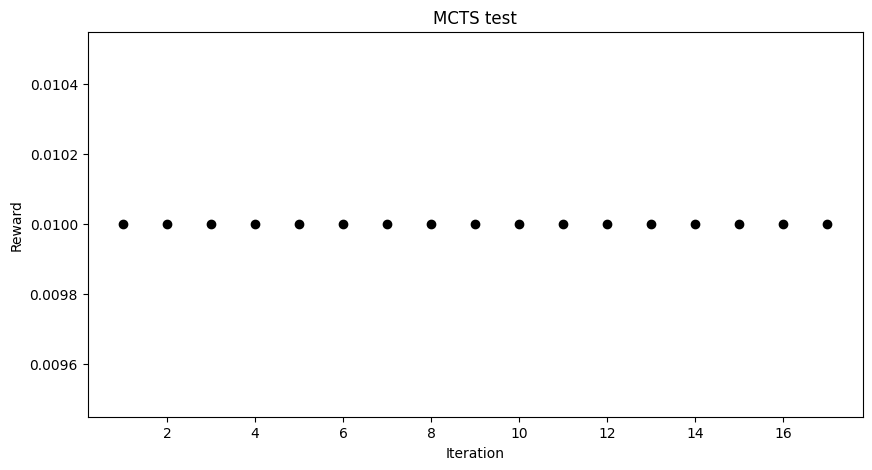

In [7]:
mcts_manager.plot_test_mcts()

KeyError: 10

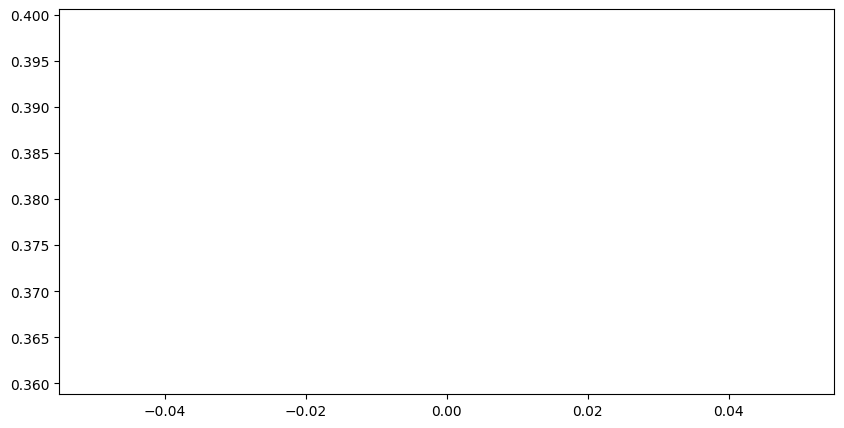

In [8]:
mcts_manager.plot_v_trajectory(mcts_manager.trajectories[0])

In [9]:
mcts_manager.trajectories[0]

[(0, 10),
 (7143265, 0),
 (743265913, 1),
 (7326591392313, 3),
 (72659139923131913, 5),
 (78659139991323131913, 16),
 (7859139991323131913, 17),
 (789139991323131913, 18),
 (7899991323131913, 18),
 (78999923131913, 18),
 (789999231913, 18),
 (7899992319, 22),
 (7899992419, 25),
 (7899992420, 28),
 (78999102420, 28),
 (789910102420, 28),
 (7891010102420, 28),
 (78101010102420, -1)]

In [11]:
mcts_manager.mcts_algorithm.get_data_state(env.initial_state)

{'Qa': {'Init': 0.37970000000000004},
 'pi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'V': 0.37970000000000004,
 'N': 3,
 'Na': {'Init': 3}}

In [12]:
mcts_manager.run_search(3, 5, iteration_checkpoint=1, num_test=3)

Num actions: 5
Available actions: [ 5  8 12 30 15]
n_branches: 0
n_branches: 0
n_branches: 1
n_branches: 0
n_branches: 1
Search iteration: 0
Number of terminal states: 148; Initial state: 0;Best state: 782812141714182810; Reward: 3.0000;
Number of states: 1858;
Max number of nonterminal rules: 5; Max number of nonterminal rules of states: 5;

State: 0; Is terminal: False; Reward: 0.0000;
Number of possible next states: 1;
Graph representation: [['ROOT']];
Actions: ['Init'];
Number nonterminal rules of states: 0;

{'Qa': {'Init': 0.38173333333333337}, 'pi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'V': 0.38173333333333337, 'N': 4, 'Na': {'Init': 4}}
Num actions: 5
Available actions: [ 0  2 13 12  7]
n_branches: 0
n_branches: 0
n_branches: 2
n_branches: 0
n_branches: 1
Search iteration: 1
Number of terminal states: 153; Initial state: 0;Best state: 782812141714182810; R

d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: divide by zero encountered in divide
  pi /= np.sum(pi)
d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: invalid value encountered in divide
  pi /= np.sum(pi)


In [2]:
mcts.load("D:\\lab_BE2R\\rostok_09_01_2023\\rostok\\examples\\results\\MCTS\\test_240823_\\checkpoint")

In [3]:
env.terminal_states

{78101010102420: (0.01, []),
 7811281027102710: (0.01, []),
 78812122128112710: (0.01, []),
 7810111125141820: (0.411, array([10.062])),
 7811111416112121: (-0.0, array([15.])),
 78810141828122712: (1.332, array([10.021])),
 78810101026212712: (0.01, []),
 78810122428122710: (0.01, []),
 78811281227112712: (0.01, []),
 788101027102711: (0.01, []),
 788111214181222: (0.558, array([10.021])),
 781024141628101418: (1.332, array([12.654, 10.021])),
 788810101125252812: (0.01, []),
 781010241418202712: (0.918, array([10.758])),
 7811111418122422: (0.939, array([10.103])),
 710111214172420: (-0.0, array([15.])),
 781112201418202710: (-0.0, array([15.])),
 78810112428122711: (0.01, []),
 78810141627122711: (-0.0, array([15.])),
 782811281027101416: (-0.0, array([15.])),
 7811281228122711: (0.01, []),
 781220141714172812: (0.642, array([10.432])),
 710141611212710: (-0.0, array([15.])),
 7881010122420212711: (0.01, []),
 78810112228112710: (0.01, []),
 781011122526211416: (-0.0, array([15.])),

In [4]:
mcts_manager.run_search(0, 5, iteration_checkpoint=0, num_test=3)

Search time: 0.0
State: 7143265, V-function: 0.18744546013176439, N: 22

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 71326592313, V-function: 0.4526000033721328, N: 9

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 7326599132313, V-function: 0.029114287015795715, N: 7

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 72659913923131913, V-function: 0.081125, N: 8

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 78659913991323131913, V-function: 0.010000000447034835, N: 7

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 7859913991323131913, V-function: 0.010000000447034835, N: 7

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 789913991323131913, V-function: 0.010000000447034835, N: 7

Test MCTS - mean reward: 0.0100, std reward: 0.0000
Search time: 0.0
State: 7899991323131913, V-function: 0.010000000521540642, N: 15



d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: divide by zero encountered in divide
  pi /= np.sum(pi)
d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: invalid value encountered in divide
  pi /= np.sum(pi)


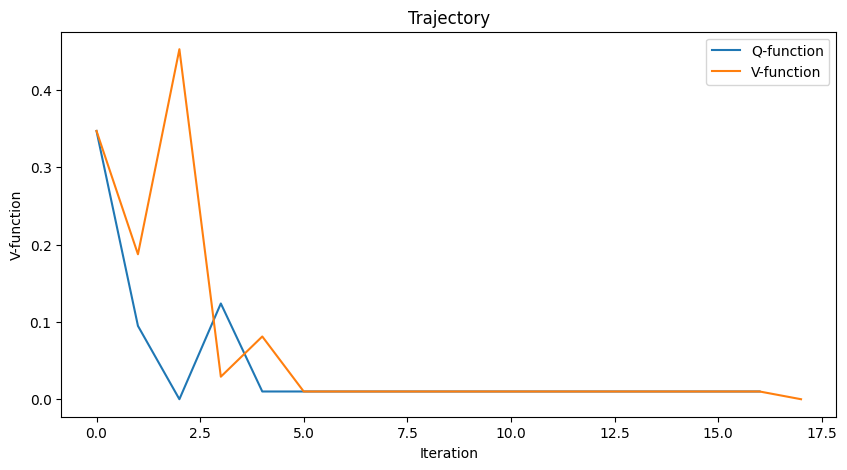

In [5]:
mcts_manager.plot_v_trajectory(mcts_manager.trajectories[0])

In [6]:
mcts_manager.run_search(3, 5, iteration_checkpoint=1, num_test=3)

Num actions: 5
Available actions: [14  3 30 11 18]
n_branches: 1
n_branches: 0
n_branches: 2
n_branches: 1
n_branches: 1
Search iteration: 0
Number of terminal states: 245; Initial state: 0;Best state: 78101418121418; Reward: 10.9080;
Number of states: 3274;
Max number of nonterminal rules: 5; Max number of nonterminal rules of states: 5;

State: 0; Is terminal: False; Reward: 0.0000;
Number of possible next states: 1;
Graph representation: [['ROOT']];
Actions: ['Init'];
Number nonterminal rules of states: 0;

{'Qa': {'Init': 0.37993333333333335}, 'pi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'V': 0.37993333333333335, 'N': 7, 'Na': {'Init': 7}}
Num actions: 5
Available actions: [ 3  4 16 29 18]
n_branches: 0
n_branches: 1
n_branches: 0
n_branches: 1
n_branches: 0
Search iteration: 1
Number of terminal states: 250; Initial state: 0;Best state: 78101418121418; Reward: 

d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: divide by zero encountered in divide
  pi /= np.sum(pi)
d:\lab_be2r\rostok_09_01_2023\rostok\rostok\graph_generators\search_algorithms\mcts.py:51: RuntimeWarning: invalid value encountered in divide
  pi /= np.sum(pi)


In [6]:
s_best = env.get_best_states()
env.terminal_states[s_best[0]]

(10.908, array([15.123, 19.776]))

In [14]:
for sa in mcts_manager.trajectories[0][:-1]:
    print(f"({sa[0]},{env.action2rule[sa[1]]}) -> Qsa: {mcts_manager.mcts_algorithm.Qsa[sa]}, Nsa: {mcts_manager.mcts_algorithm.Nsa[sa]}")
    data_s = mcts.get_data_state(sa[0])
    print(f"{sa[0]} -> Qa: {data_s['Qa']}")
    print(f"{sa[0]} -> Nsa: {data_s['Na']}")
    print(f"{sa[0]} -> Ns: {data_s['N']} V: {data_s['V']}")
    print()
    

(0,Init) -> Qsa: 0.34692500000000004, Nsa: 9
0 -> Qa: {'Init': 0.34692500000000004}
0 -> Nsa: {'Init': 9}
0 -> Ns: 9 V: 0.34692500000000004

(7143265,AddFinger_N) -> Qsa: 0.0948, Nsa: 2
7143265 -> Qa: {'AddFinger': 0.11960000000000001, 'AddFinger_N': 0.0948, 'AddFinger_NT': 0.004, 'AddFinger_P': 0.13240000000000002, 'AddFinger_PT': 0.014000000000000012, 'AddFinger_R': 0.1257999999999999, 'AddFinger_RN': 0.38580000000000003, 'AddFinger_RNT': 0.01, 'AddFinger_RP': 0.01, 'AddFinger_RPT': 0.3792, 'RemoveFinger': 0.006, 'RemoveFinger_N': 0.12779999999999997, 'RemoveFinger_P': 0.37, 'RemoveFinger_R': 0.1136, 'RemoveFinger_RN': -0.0, 'RemoveFinger_RP': 0.7492000000000001}
7143265 -> Nsa: {'AddFinger': 1, 'AddFinger_N': 2, 'AddFinger_NT': 1, 'AddFinger_P': 1, 'AddFinger_PT': 2, 'AddFinger_R': 2, 'AddFinger_RN': 1, 'AddFinger_RNT': 1, 'AddFinger_RP': 1, 'AddFinger_RPT': 1, 'RemoveFinger': 1, 'RemoveFinger_N': 2, 'RemoveFinger_P': 2, 'RemoveFinger_R': 1, 'RemoveFinger_RN': 1, 'RemoveFinger_RP': 

In [19]:
env.transition_function

{(0, 10): (7143265, 0.0, False),
 (7143265, 0): (743265913, 0.0, False),
 (743265913, 1): (7326591392313, 0.0, False),
 (7326591392313, 3): (72659139923131913, 0.0, False),
 (72659139923131913, 5): (78659139991323131913, 0.0, False),
 (78659139991323131913, 16): (7859139991323131913, 0.0, False),
 (7859139991323131913, 17): (789139991323131913, 0.0, False),
 (789139991323131913, 18): (7899991323131913, 0.0, False),
 (7899991323131913, 18): (78999923131913, 0.0, False),
 (78999923131913, 18): (789999231913, 0.0, False),
 (789999231913, 18): (7899992319, 0.0, False),
 (7899992319, 22): (7899992419, 0.0, False),
 (7899992419, 25): (7899992420, 0.0, False),
 (7899992420, 28): (78999102420, 0.0, False),
 (78999102420, 28): (789910102420, 0.0, False),
 (789910102420, 28): (7891010102420, 0.0, False),
 (7891010102420, 28): (78101010102420, 0.01, True),
 (7143265, 7): (714382527913, 0.0, False),
 (714382527913, 15): (71438527913, 0.0, False),
 (71438527913, 0): (7438591327913, 0.0, False),
 (7